<a href="https://colab.research.google.com/github/Prasanna-k-Nalabolu/M-P-1/blob/main/Dpnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
import requests
import zipfile
import os

# Load dataset
train_path = "/content/WASSA23_essay_level_with_labels_train.tsv"
print("Loading dataset...")
df = pd.read_csv(train_path, sep='\t')
print("\nDataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nDataset Description:")
print(df.describe())
print("\nFirst few rows:")
print(df.head())



Loading dataset...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   conversation_id                792 non-null    int64  
 1   article_id                     792 non-null    int64  
 2   essay                          792 non-null    object 
 3   empathy                        792 non-null    float64
 4   distress                       792 non-null    float64
 5   speaker_id                     792 non-null    int64  
 6   gender                         792 non-null    object 
 7   education                      792 non-null    object 
 8   race                           792 non-null    object 
 9   age                            792 non-null    object 
 10  income                         792 non-null    object 
 11  personality_conscientiousness  792 non-null    object 
 12  personality_open

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

print("\nApplying text preprocessing...")
df['cleaned_essay'] = df['essay'].apply(preprocess_text)
print("Preprocessing complete. Sample of cleaned essays:")
print(df[['essay', 'cleaned_essay']].head())


Applying text preprocessing...
Preprocessing complete. Sample of cleaned essays:
                                               essay  \
0  It breaks my heart to see people living in tho...   
1  I wonder why there aren't more people trying t...   
2  After reading the article, you can't help but ...   
3  It is so sad that someone who had such an amaz...   
4  From reading the article, it looks like the wo...   

                                       cleaned_essay  
0  it breaks my heart to see people living in tho...  
1  i wonder why there arent more people trying to...  
2  after reading the article you cant help but fe...  
3  it is so sad that someone who had such an amaz...  
4  from reading the article it looks like the wor...  

Generating preprocessing visualizations...


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>


Generating preprocessing visualizations...


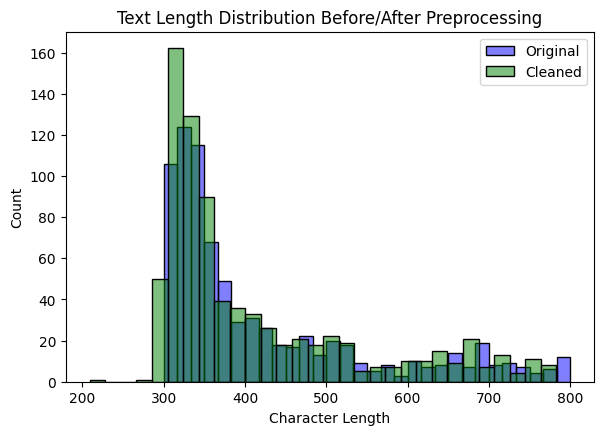

In [ ]:
# Additional visualization after preprocessing
print("\nGenerating preprocessing visualizations...")
plt.figure(figsize=(15, 10))

# Length distribution before and after preprocessing
df['original_length'] = df['essay'].str.len()
df['cleaned_length'] = df['cleaned_essay'].str.len()
plt.subplot(2, 2, 1)
sns.histplot(df['original_length'], bins=30, color='blue', alpha=0.5, label='Original')
sns.histplot(df['cleaned_length'], bins=30, color='green', alpha=0.5, label='Cleaned')
plt.title('Text Length Distribution Before/After Preprocessing')
plt.xlabel('Character Length')
plt.legend()



Generating preprocessing visualizations...


Text(0, 0.5, 'Number of Words')

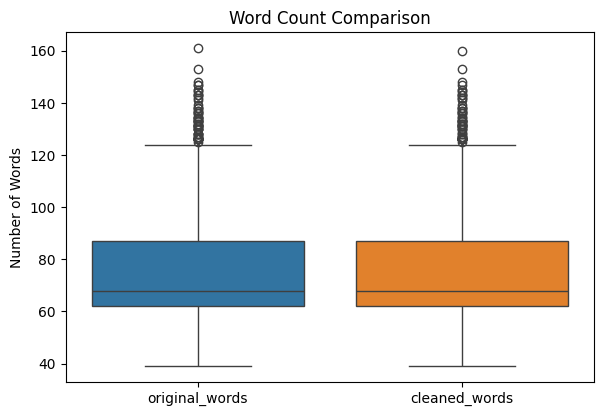

In [ ]:
# Additional visualization after preprocessing
print("\nGenerating preprocessing visualizations...")
plt.figure(figsize=(15, 10))


# Word count comparison
df['original_words'] = df['essay'].str.split().str.len()
df['cleaned_words'] = df['cleaned_essay'].str.split().str.len()
plt.subplot(2, 2, 2)
sns.boxplot(data=df[['original_words', 'cleaned_words']])
plt.title('Word Count Comparison')
plt.ylabel('Number of Words')


Generating preprocessing visualizations...


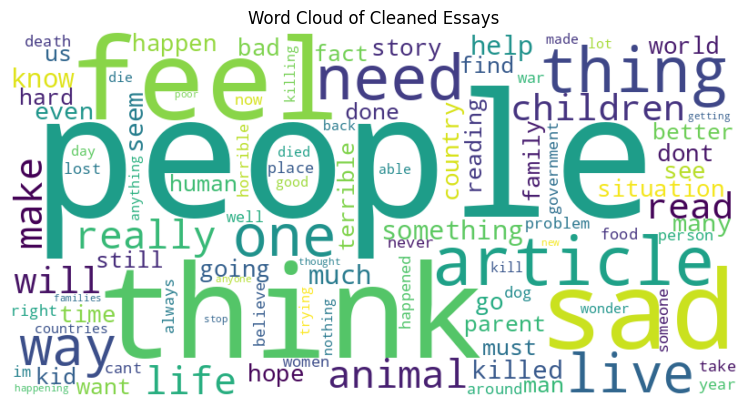

In [ ]:
# Additional visualization after preprocessing
print("\nGenerating preprocessing visualizations...")
plt.figure(figsize=(15, 10))

# Word cloud
plt.subplot(2, 2, 3)
all_text = ' '.join(df['cleaned_essay'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Essays')

plt.tight_layout()
plt.show()


In [ ]:
# Encode labels
print("\nEncoding labels...")
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['emotion'])
print("Label encoding complete. Classes:", label_encoder.classes_)
print("Label distribution:")
print(df['emotion'].value_counts())


Encoding labels...
Label encoding complete. Classes: ['Anger' 'Anger/Disgust' 'Anger/Disgust/Sadness' 'Anger/Fear' 'Anger/Hope'
 'Anger/Joy' 'Anger/Neutral' 'Anger/Sadness' 'Anger/Surprise' 'Disgust'
 'Disgust/Fear' 'Disgust/Neutral' 'Disgust/Sadness' 'Disgust/Surprise'
 'Fear' 'Fear/Hope' 'Fear/Neutral' 'Fear/Sadness' 'Hope' 'Hope/Neutral'
 'Hope/Sadness' 'Joy' 'Joy/Neutral' 'Joy/Sadness' 'Neutral'
 'Neutral/Sadness' 'Neutral/Surprise' 'Sadness' 'Sadness/Surprise'
 'Surprise']
Label distribution:
emotion
Sadness                  297
Neutral                  202
Anger                     67
Disgust                   44
Anger/Disgust             28
Disgust/Sadness           18
Neutral/Sadness           18
Fear/Sadness              16
Hope/Sadness              15
Anger/Sadness             14
Fear                      10
Hope                      10
Surprise                   9
Anger/Neutral              8
Joy                        5
Hope/Neutral               4
Disgust/Surprise        


Generating preprocessing visualizations...


<Figure size 1500x1000 with 0 Axes>

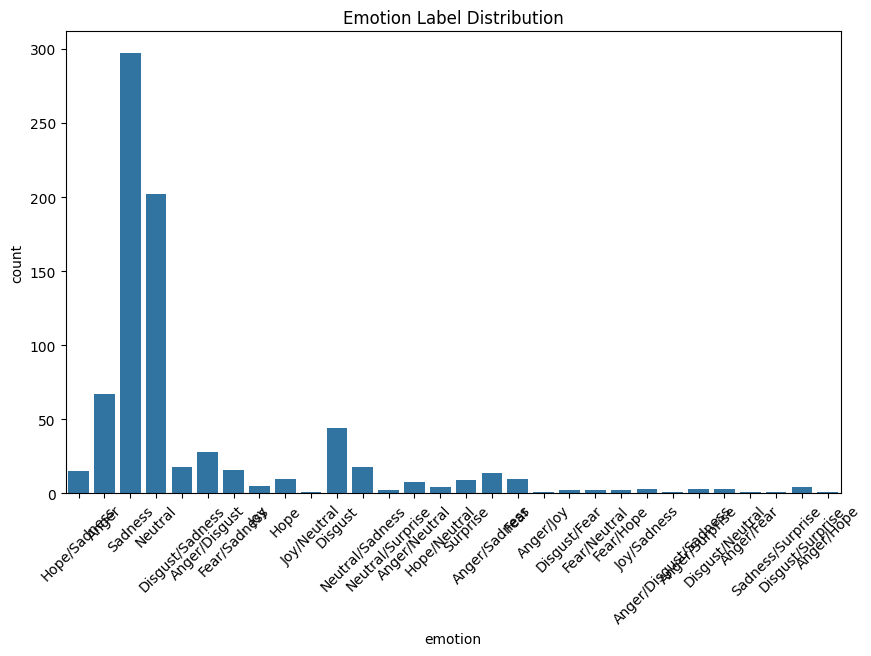

In [ ]:
# Additional visualization after preprocessing
print("\nGenerating preprocessing visualizations...")
plt.figure(figsize=(15, 10))

# Visualize label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df)
plt.title('Emotion Label Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Split dataset
print("\nSplitting dataset...")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)




Splitting dataset...
Train set shape: (633, 30)
Validation set shape: (159, 30)


In [ ]:
# Tokenizer
print("\nInitializing BERT tokenizer...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
print("Tokenizer vocabulary size:", len(tokenizer))


Initializing BERT tokenizer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenizer vocabulary size: 30522


In [ ]:
# Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels=None, tokenizer=None, max_len=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=self.max_len, return_tensors='pt')
        item = {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0)
        }
        if self.labels is not None:
            item['label'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item



In [ ]:
# DataLoaders
print("\nCreating datasets and dataloaders...")
train_dataset = TextDataset(train_df['cleaned_essay'].tolist(), train_df['emotion_label'].tolist(), tokenizer)
val_dataset = TextDataset(val_df['cleaned_essay'].tolist(), val_df['emotion_label'].tolist(), tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
print(f"Train loader batches: {len(train_loader)}, Val loader batches: {len(val_loader)}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




Creating datasets and dataloaders...
Train loader batches: 40, Val loader batches: 10


In [ ]:
# Load pretrained GloVe embeddings (manual download approach)
print("\nLoading GloVe embeddings...")
def load_glove_embeddings(dim=200):
    glove_url = f"http://nlp.stanford.edu/data/glove.6B.zip"
    glove_file = "glove.6B.zip"
    glove_path = f"glove.6B.{dim}d.txt"

    if not os.path.exists(glove_path):
        print("Downloading GloVe embeddings...")
        response = requests.get(glove_url)
        with open(glove_file, 'wb') as f:
            f.write(response.content)
        with zipfile.ZipFile(glove_file, 'r') as zip_ref:
            zip_ref.extractall()
        os.remove(glove_file)

    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = torch.tensor([float(val) for val in values[1:]], dtype=torch.float32)
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings(dim=200)
embedding_matrix = torch.zeros(30522, 200)
vocab = tokenizer.get_vocab()
for token, idx in vocab.items():
    if token in glove_embeddings:
        embedding_matrix[idx] = glove_embeddings[token]
print("GloVe embeddings loaded.")




Loading GloVe embeddings...
GloVe embeddings loaded.


In [ ]:
# CNN Model
class CNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_filters, filter_sizes, output_dim, dropout=0.5, pretrained_embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(pretrained_embeddings)
            self.embedding.weight.requires_grad = True
        self.convs = nn.ModuleList([nn.Conv1d(embed_dim, num_filters, fs) for fs in filter_sizes])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)

    def forward(self, x):
        embedded = self.embedding(x).permute(0, 2, 1)
        convs = [torch.relu(conv(embedded)).max(dim=2)[0] for conv in self.convs]
        pooled = torch.cat(convs, dim=1)
        pooled = self.dropout(pooled)
        return self.fc(pooled)

# RNN Model
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, dropout=0.5, pretrained_embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(pretrained_embeddings)
            self.embedding.weight.requires_grad = True
        self.rnn = nn.RNN(embed_dim, hidden_dim, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        rnn_out, hidden = self.rnn(embedded)
        hidden = hidden[-1, :, :]  # Take the last layer's hidden state
        hidden = self.dropout(hidden)
        return self.fc(hidden)

# Transformer Encoder Model
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, n_heads, hidden_dim, n_layers, output_dim, dropout=0.3, pretrained_embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(pretrained_embeddings)
            self.embedding.weight.requires_grad = True
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=n_heads, dim_feedforward=hidden_dim, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(embed_dim, output_dim)

    def forward(self, x, mask=None):
        embedded = self.embedding(x)
        transformer_out = self.transformer_encoder(embedded, src_key_padding_mask=mask)
        pooled = transformer_out[:, 0, :]
        pooled = self.dropout(pooled)
        return self.fc(pooled)

In [ ]:
# Initialize models
print("\nInitializing models...")
cnn_model = CNNModel(
    vocab_size=30522,
    embed_dim=200,
    num_filters=100,
    filter_sizes=[3, 4, 5],
    output_dim=len(label_encoder.classes_),
    dropout=0.5,
    pretrained_embeddings=embedding_matrix
).to(device)

rnn_model = RNNModel(
    vocab_size=30522,
    embed_dim=200,
    hidden_dim=256,
    output_dim=len(label_encoder.classes_),
    dropout=0.5,
    pretrained_embeddings=embedding_matrix
).to(device)

transformer_model = TransformerModel(
    vocab_size=30522,
    embed_dim=200,
    n_heads=8,
    hidden_dim=1024,
    n_layers=3,
    output_dim=len(label_encoder.classes_),
    dropout=0.3,
    pretrained_embeddings=embedding_matrix
).to(device)



Initializing models...


In [ ]:
# Optimizers
optimizer_cnn = optim.Adam([
    {'params': cnn_model.embedding.parameters(), 'lr': 1e-5},
    {'params': [p for n, p in cnn_model.named_parameters() if 'embedding' not in n], 'lr': 0.0005}
], weight_decay=1e-3)

optimizer_rnn = optim.Adam([
    {'params': rnn_model.embedding.parameters(), 'lr': 1e-5},
    {'params': [p for n, p in rnn_model.named_parameters() if 'embedding' not in n], 'lr': 0.001}
], weight_decay=1e-3)

optimizer_transformer = optim.Adam([
    {'params': transformer_model.embedding.parameters(), 'lr': 1e-5},
    {'params': [p for n, p in transformer_model.named_parameters() if 'embedding' not in n], 'lr': 0.001}
], weight_decay=1e-3)


In [ ]:
# Models and optimizers dictionary
models = {
    'CNN': cnn_model,
    'RNN': rnn_model,
    'Transformer': transformer_model
}
optimizers = {
    'CNN': optimizer_cnn,
    'RNN': optimizer_rnn,
    'Transformer': optimizer_transformer
}



In [ ]:
# Training loop
print("\nStarting training...")
train_losses, val_losses, train_accuracies, val_accuracies = {}, {}, {}, {}
epochs = 30
criterion = nn.CrossEntropyLoss()

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")
    optimizer = optimizers[model_name]
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
    train_losses[model_name], val_losses[model_name], train_accuracies[model_name], val_accuracies[model_name] = [], [], [], []
    best_val_acc = 0.0
    patience = 7
    early_stop_counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        total_train_loss, train_correct = 0, 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
            if model_name == 'Transformer':
                outputs = model(input_ids, mask=(attention_mask == 0))
            else:
                outputs = model(input_ids)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            train_correct += outputs.argmax(dim=1).eq(labels).sum().item()
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = train_correct / len(train_dataset)
        train_losses[model_name].append(avg_train_loss)
        train_accuracies[model_name].append(train_accuracy)
        print(f"{model_name} Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Validation
        model.eval()
        total_val_loss, val_correct = 0, 0
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['label'].to(device)
                if model_name == 'Transformer':
                    outputs = model(input_ids, mask=(attention_mask == 0))
                else:
                    outputs = model(input_ids)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                val_correct += outputs.argmax(dim=1).eq(labels).sum().item()
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = val_correct / len(val_dataset)
        val_losses[model_name].append(avg_val_loss)
        val_accuracies[model_name].append(val_accuracy)
        print(f"{model_name} Epoch {epoch+1} - Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        scheduler.step(avg_val_loss)

        # Early stopping
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            print(f"{model_name} Early stopping counter: {early_stop_counter}/{patience}")
            if early_stop_counter >= patience:
                print(f"{model_name} Early stopping triggered!")
                break




Starting training...

Training CNN model...
CNN Epoch 1 - Train Loss: 2.3939, Train Accuracy: 0.3444
CNN Epoch 1 - Val Loss: 2.0506, Val Accuracy: 0.5346
CNN Epoch 2 - Train Loss: 1.9783, Train Accuracy: 0.4550
CNN Epoch 2 - Val Loss: 1.9517, Val Accuracy: 0.4717
CNN Early stopping counter: 1/7
CNN Epoch 3 - Train Loss: 1.8640, Train Accuracy: 0.5229
CNN Epoch 3 - Val Loss: 1.8980, Val Accuracy: 0.5535
CNN Epoch 4 - Train Loss: 1.6980, Train Accuracy: 0.5450
CNN Epoch 4 - Val Loss: 1.8382, Val Accuracy: 0.5535
CNN Early stopping counter: 1/7
CNN Epoch 5 - Train Loss: 1.6118, Train Accuracy: 0.5656
CNN Epoch 5 - Val Loss: 1.8299, Val Accuracy: 0.5409
CNN Early stopping counter: 2/7
CNN Epoch 6 - Train Loss: 1.4977, Train Accuracy: 0.6145
CNN Epoch 6 - Val Loss: 1.8222, Val Accuracy: 0.5220
CNN Early stopping counter: 3/7
CNN Epoch 7 - Train Loss: 1.3980, Train Accuracy: 0.6351
CNN Epoch 7 - Val Loss: 1.7794, Val Accuracy: 0.5409
CNN Early stopping counter: 4/7
CNN Epoch 8 - Train Loss:

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:508: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. We recommend specifying layout=torch.jagged when constructing a nested tensor, as this layout receives active development, has better operator coverage, and works with torch.compile. (Triggered internally at /pytorch/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


Transformer Epoch 1 - Val Loss: 2.2048, Val Accuracy: 0.2327
Transformer Epoch 2 - Train Loss: 2.2003, Train Accuracy: 0.3239
Transformer Epoch 2 - Val Loss: 2.1757, Val Accuracy: 0.4088
Transformer Epoch 3 - Train Loss: 2.1728, Train Accuracy: 0.3302
Transformer Epoch 3 - Val Loss: 2.1007, Val Accuracy: 0.4088
Transformer Early stopping counter: 1/7
Transformer Epoch 4 - Train Loss: 2.1815, Train Accuracy: 0.3302
Transformer Epoch 4 - Val Loss: 2.1595, Val Accuracy: 0.4088
Transformer Early stopping counter: 2/7
Transformer Epoch 5 - Train Loss: 2.1413, Train Accuracy: 0.3349
Transformer Epoch 5 - Val Loss: 2.1453, Val Accuracy: 0.4088
Transformer Early stopping counter: 3/7
Transformer Epoch 6 - Train Loss: 2.1497, Train Accuracy: 0.3412
Transformer Epoch 6 - Val Loss: 2.1211, Val Accuracy: 0.4088
Transformer Early stopping counter: 4/7
Transformer Epoch 7 - Train Loss: 2.1823, Train Accuracy: 0.3381
Transformer Epoch 7 - Val Loss: 2.1347, Val Accuracy: 0.4088
Transformer Early stopp


Generating final visualizations...


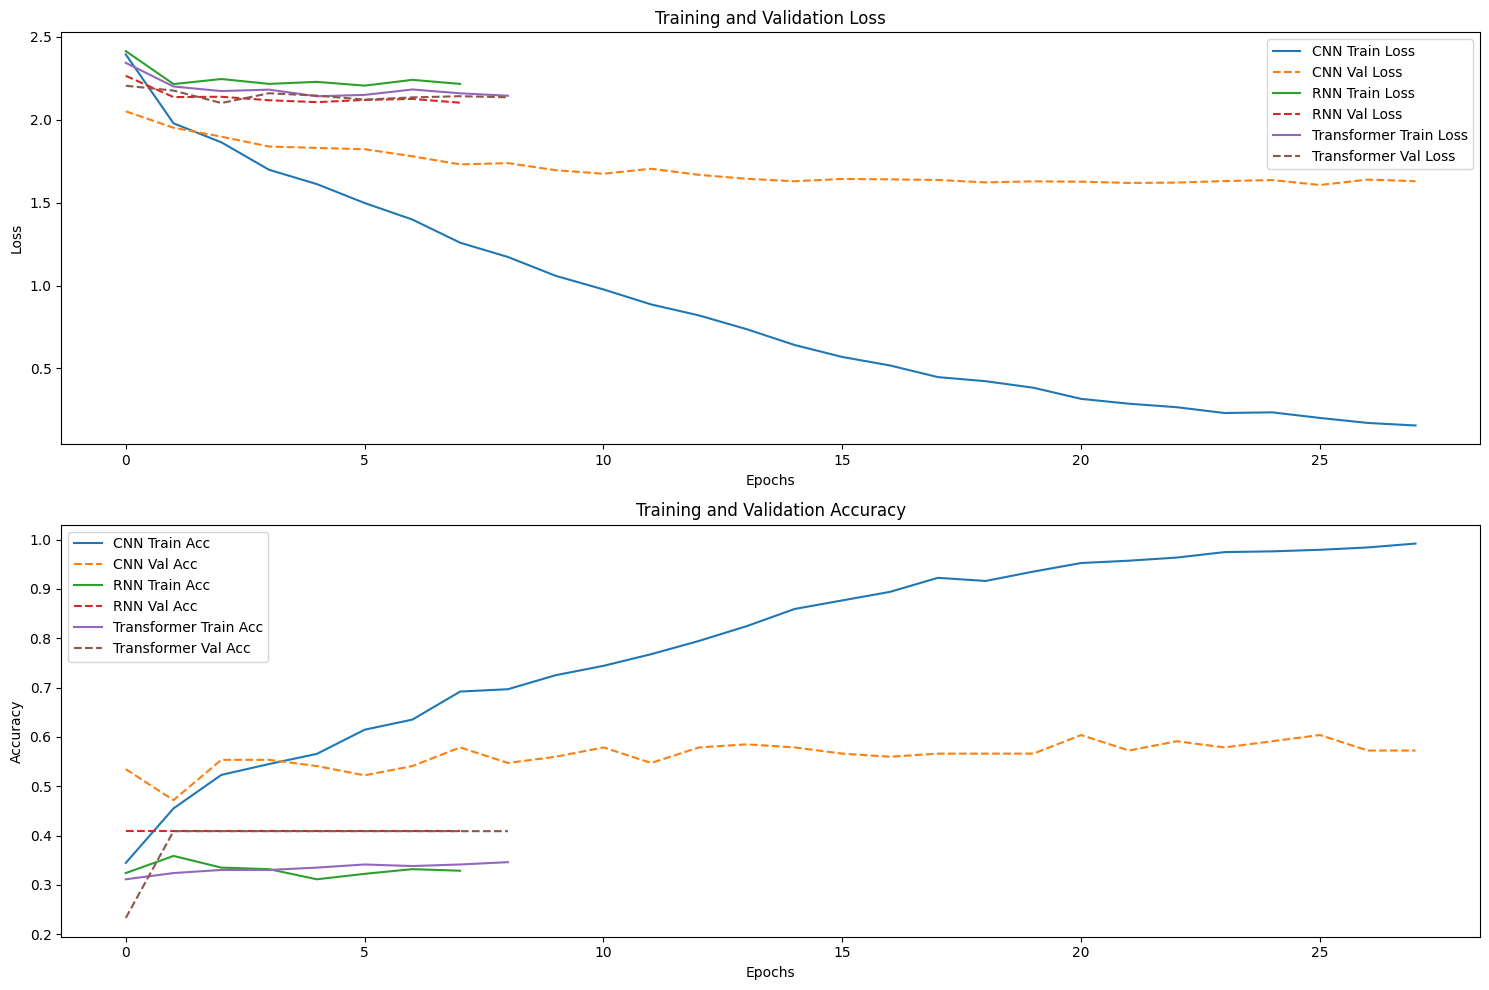

In [ ]:
# Enhanced plotting
print("\nGenerating final visualizations...")
plt.figure(figsize=(15, 10))

# Loss plots
plt.subplot(2, 1, 1)
for model_name in models.keys():
    plt.plot(range(len(train_losses[model_name])), train_losses[model_name], label=f'{model_name} Train Loss')
    plt.plot(range(len(val_losses[model_name])), val_losses[model_name], label=f'{model_name} Val Loss', linestyle='--')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Accuracy plots
plt.subplot(2, 1, 2)
for model_name in models.keys():
    plt.plot(range(len(train_accuracies[model_name])), train_accuracies[model_name], label=f'{model_name} Train Acc')
    plt.plot(range(len(val_accuracies[model_name])), val_accuracies[model_name], label=f'{model_name} Val Acc', linestyle='--')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()



Final Accuracy Scores:


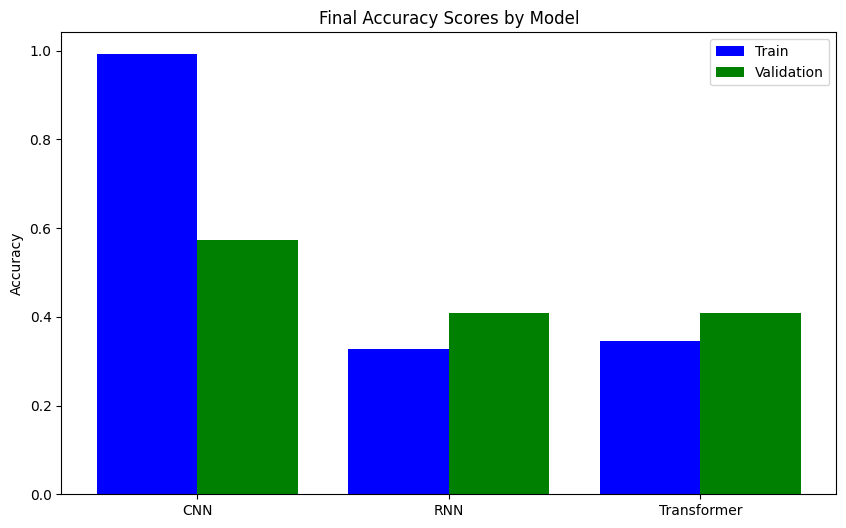

In [ ]:
# Final accuracy scores with bar plot
print("\nFinal Accuracy Scores:")
final_train_acc = {model: acc[-1] for model, acc in train_accuracies.items()}
final_val_acc = {model: acc[-1] for model, acc in val_accuracies.items()}

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar([i-0.2 for i in x], final_train_acc.values(), width=0.4, label='Train', color='blue')
plt.bar([i+0.2 for i in x], final_val_acc.values(), width=0.4, label='Validation', color='green')
plt.xticks(x, models.keys())
plt.title('Final Accuracy Scores by Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
for model_name in train_accuracies:
    print(f"{model_name} Train Accuracy: {train_accuracies[model_name][-1]:.4f}")
    print(f"{model_name} Val Accuracy: {val_accuracies[model_name][-1]:.4f}")

CNN Train Accuracy: 0.9921
CNN Val Accuracy: 0.5723
RNN Train Accuracy: 0.3286
RNN Val Accuracy: 0.4088
Transformer Train Accuracy: 0.3460
Transformer Val Accuracy: 0.4088
